In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from classifier import Classifier
from tqdm import tqdm

In [2]:
# Create object
classifier = Classifier()

In [3]:
# Set midpoints

# winlen_len: window-length for smoothing length data, larger value == smoother length curve
classifier.set_midpoints("/home/hengji/Documents/hydracv/hydracv/classifier/data/Control-EGCaMP_exp1_a1_30x10fps_midpoints.csv",
                         winlen_len=31)

In [4]:
# Set videopath
classifier.set_videopath("/home/hengji/Documents/hydrafiles/videos/EGCaMP/Control-EGCaMP_exp1_a1_30x10fps.avi")

In [5]:
# Run the classifier

# Parameters:
# winlen_slp: window-length for smoothing slope, larger value == smoother slope curve
# lo_slp_thres: higher bound of slope in predicting contraction, larger value == more sensitive to contraction
# hi_slp_thres: lower bound of slope in predicting elongation, smaller value == more sensitive to elongation
# lo_len_thres: higher bound of length in predicting CB, larger value == looser restriction to predict CB
# hi_len_thres: lower bound of length in predicting an elongated state, smaller value == looser restriction to predict elongated
# theta_mfh_thres: 1st threshold of predicting bending, smaller value == more sensitive to bending
# theta_qfm_thres: 2nd threshold of predicting bending, smaller value == more sensitive to bending
# cb_no_elong: whether to deny the "bounding backs" during CB as elongation? True == Yes
classifier.classify(winlen_slp=21,
                    lo_slp_thres=0,
                    hi_slp_thres=0,
                    lo_len_thres=0.06,
                    hi_len_thres=0.7,
                    theta_mfh_thres=0.2,
                    theta_qfm_thres=0.2,
                    cb_no_elong=False)

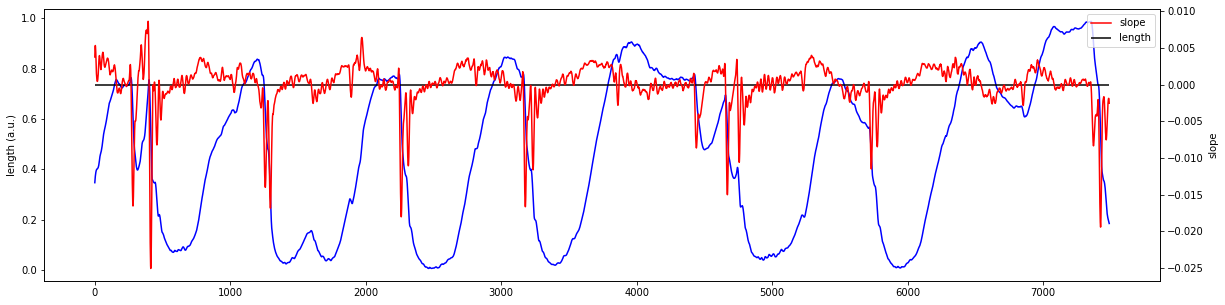

In [6]:
classifier.plot_slopes_and_lengths()

100%|██████████| 7489/7489 [00:34<00:00, 220.19it/s]


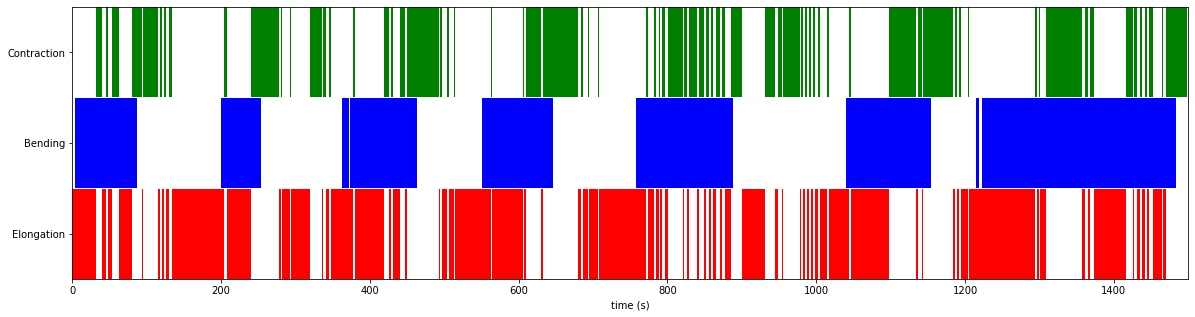

In [7]:
# Plot the behavior periods
classifier.plot_behavior_periods(savepath='/home/hengji/Documents/hydracv/hydracv/classifier/results/Control-EGCaMP_exp1_a1_30x10fps/classified_behaviors.png')

In [24]:
# Load manual labels
df = pd.read_csv('./data/EGCaMP6_Manual_Imaging_Analysis - Control-EGCaMP_L-typer_exp1_a1_30x10fps_5%.csv', header=1)

In [47]:
# Extract periods for each behavior
cb_periods = df[df.Behavior.str.contains('CB')]['Time of Event'].values
bend_periods = df[df.Behavior.str.contains('Bend')]['Time of Event'].values

In [48]:
# Reformat periods
def reformat_periods(periods, unit='sec'):

    for j in range(len(periods)):
        
        time_str_pair = periods[j].split('-')
        
        if len(time_str_pair) < 2:
            continue
        
        periods[j] = (reformat_time(time_str_pair[0], unit), reformat_time(time_str_pair[1], unit))
        
    return periods

def reformat_time(time_string, unit='sec'):
    
    time_pair = [int(x) for x in time_string.split(':')]
    
    if unit == 'sec':
    
        time_num = time_pair[0]*60 + time_pair[1]
        
    elif unit == 'min':
        
        time_num = time_pair[0] + time_pair[1]/60
        
    return time_num

bend_periods = reformat_periods(bend_periods, unit='sec')
cb_periods = reformat_periods(cb_periods, unit='sec')

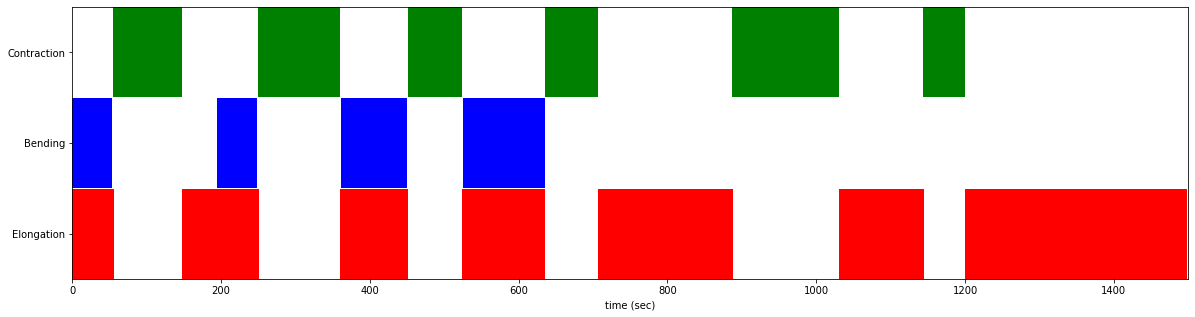

In [58]:
# Plot the periods

plt.figure(figsize=(20, 5))
# for period in elong_periods:
#     plt.hlines(1, period[0], period[1], colors='r', linewidth=90)
for period in bend_periods:
    plt.hlines(2, period[0], period[1], colors='b', linewidth=90)
for period in cb_periods[:-1]:
    plt.hlines(3, period[0], period[1], colors='g', linewidth=90)
for iframe in (range(classifier.nframes)):
    isec = iframe / classifier.fps
    flag = True
    for period in cb_periods[:-1]:
        if period[0] <= isec < period[1]:
            flag = False
            break
    if flag:
        plt.hlines(1, isec, isec+1, colors='r', linewidth=90)
plt.yticks([1,2,3], ['Elongation', 'Bending', 'Contraction'])
plt.ylim(0.5, 3.5)
plt.xlim(0, 1500)
plt.xlabel('time (sec)')
# plt.savefig('./results/Periods_'+FILENAME.strip('.csv')+'.png')
plt.show()

100%|██████████| 7489/7489 [00:36<00:00, 202.63it/s]


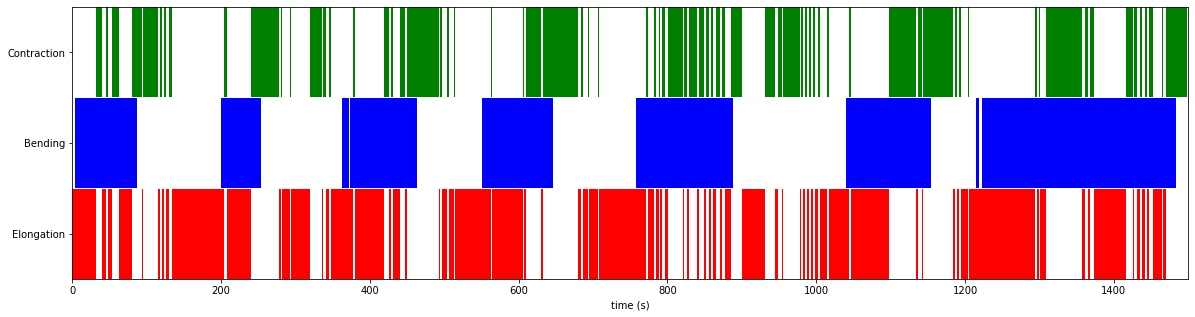

In [56]:
classifier.plot_behavior_periods()

In [11]:
# Save behaviors
df = pd.DataFrame(classifier.behaviors)
df.to_csv('/home/hengji/Documents/hydracv/hydracv/classifier/results/Control-EGCaMP_exp1_a1_30x10fps/behaviors.csv')

In [13]:
classifier.behaviors

[['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', ''],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Bending'],
 ['Elongation', 'Ben